# **1) Librerias**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ####
import seaborn as sns
from scipy import stats
import warnings


from scipy.stats import trim_mean
from matplotlib import style
from tqdm import tqdm

warnings.filterwarnings('ignore')

# **2 Importar Datos**

In [2]:
df=pd.read_csv("BaseDepurada.csv")
cat_columns=pd.read_csv("cat_columns.csv")["variable"].tolist()
num_columns=pd.read_csv("num_columns.csv")["variable"].tolist()
df.head(2)

,ID,MontoCredito,Edad,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora,Genero_Homologado,EducacionHomologada,EstadoCivilHomologado
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,689.0,0.0,0.0,0.0,0.0,1,Masculino,Pregrado,Casado
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,Masculino,Pregrado,Soltero


In [3]:
df[cat_columns]=df[cat_columns].astype("category")
df[num_columns]=df[num_columns].astype(float)
df["ID"]=df["ID"].astype(str)

In [4]:
df.shape

(30000, 25)

In [5]:
len(cat_columns)

10

In [6]:
cat_columns

['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'Mora',
 'Genero_Homologado',
 'EducacionHomologada',
 'EstadoCivilHomologado']

In [7]:
len(num_columns)

14

In [8]:
num_columns

['MontoCredito',
 'Edad',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [9]:
df.head()

,ID,MontoCredito,Edad,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora,Genero_Homologado,EducacionHomologada,EstadoCivilHomologado
0,1,20000.0,24.0,2,2,-1,-1,-2,-2,3913.0,...,0.0,689.0,0.0,0.0,0.0,0.0,1,Masculino,Pregrado,Casado
1,2,120000.0,26.0,-1,2,0,0,0,2,2682.0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,Masculino,Pregrado,Soltero
2,3,90000.0,34.0,0,0,0,0,0,0,29239.0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,Masculino,Pregrado,Soltero
3,4,50000.0,37.0,0,0,0,0,0,0,46990.0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,Masculino,Pregrado,Casado
4,5,50000.0,57.0,-1,0,-1,0,0,0,8617.0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,Femenino,Pregrado,Casado


# **3) Análisis Exploratorio y Descriptivo de los Datos**

Es un enfoque inicial y esencial en el análisis de datos que permite comprender la estructura, las relaciones y las principales características de los datos antes de proceder a técnicas de modelado o inferencia estadística más complejas.

El EDA es un paso fundamental en cualquier proyecto de análisis de datos o ciencia de datos. Permite a los analistas familiarizarse con los datos, comprender sus peculiaridades y, a menudo, guiar el camino para los análisis subsiguientes.


* Visualizar la distribución de los datos.
* Identificar patrones y relaciones entre variables.
* Detectar anomalías o valores atípicos.
* Testear suposiciones o hipótesis.


* Histogramas: para visualizar la distribución univariada de una variable.
* Boxplots (diagramas de caja): para visualizar la distribución y detectar valores atípicos.
* Diagramas de dispersión (scatter plots): para explorar relaciones entre dos variables.
* Matrices de correlación: para identificar relaciones lineales entre variables.
* Mapas de calor (heatmaps): para visualizar matrices de * correlación o la distribución conjunta de dos variables categóricas.
* Gráficos de barras: para visualizar la distribución de variables categóricas

## **3.1) Análisis Univariado: variables categóricas**

### **Distribucción**

In [10]:
df["Mora"].value_counts()

Mora
0    23364
1     6636
Name: count, dtype: int64

In [11]:
df["Mora"].value_counts(normalize=True)

Mora
0    0.7788
1    0.2212
Name: proportion, dtype: float64

**Gráficas**

In [12]:
homologacion_mora={0:"Pago",1:"No Pago"}

In [13]:
conteo_mora=df[["Mora"]]
conteo_mora["Mora"]=conteo_mora["Mora"].map(homologacion_mora)

In [14]:
colors={"#808080","#00FFFF"}

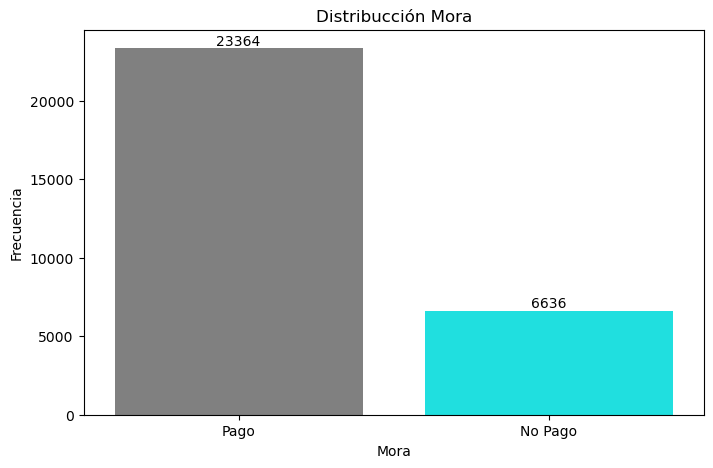

In [15]:
plt.figure(figsize=(8,5))
sns.set_palette(sns.color_palette(colors))
sns.countplot(data=conteo_mora,x="Mora")
plt.title("Distribucción Mora")
plt.ylabel("Frecuencia")
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),
            f'{int(p.get_height())}',
            ha='center', va='bottom')
plt.show()

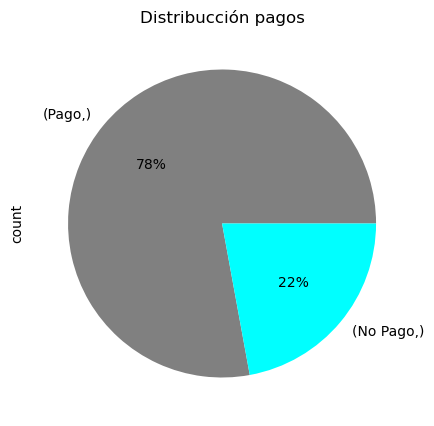

In [16]:
plt.figure(figsize=(8,5))
conteo_mora.value_counts().plot(kind="pie", autopct='%1.0f%%')
plt.title("Distribucción pagos")
plt.show()

In [17]:
labels=conteo_mora["Mora"].value_counts().index.tolist()
sizes=conteo_mora["Mora"].value_counts().values.tolist()

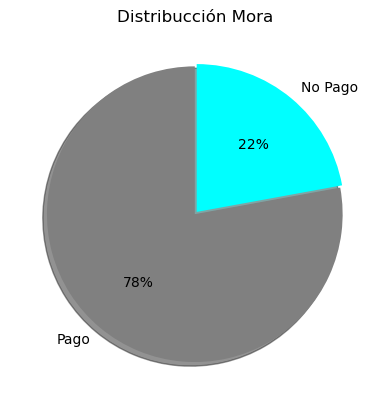

In [18]:
explode = (0, 0.02)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
plt.title("Distribucción Mora")
plt.show()

* 22% son usuarios que entraron de dafault vs 78% no han entrado en default. Distribucción desbalanceada

## **3.2) Análisis Univariado: variables Numéricas**

### **Distribucción**

In [19]:
valor_credito=df["MontoCredito"]

**Histograma**

Un histograma es una representación gráfica que muestra la distribución de frecuencia de un conjunto de datos continuos o discretos. En un histograma, el rango total de valores se divide en intervalos o "bins", y se cuenta cuántas veces caen los datos en cada intervalo. Luego, estos recuentos se representan como barras en un gráfico, donde la altura de cada barra representa la frecuencia de los datos en ese intervalo.

In [20]:
valor_credito.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: MontoCredito, dtype: float64

#### **Medidas de Tendencia Central**

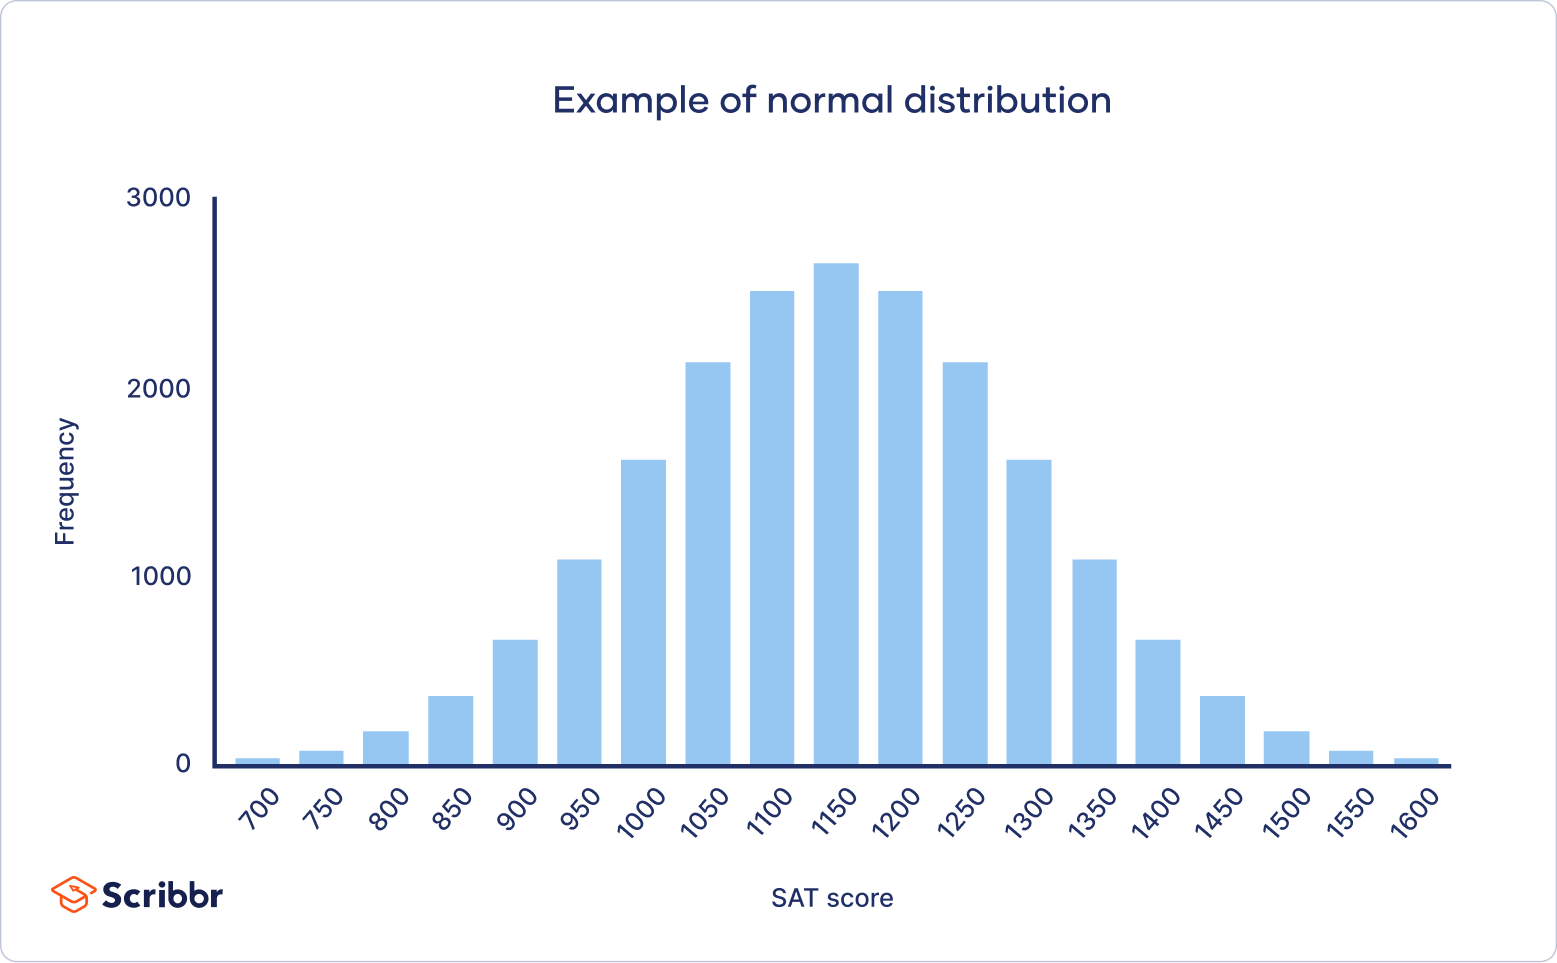

* El promedio, también conocido como media, es una medida estadística utilizada para representar un valor central o típico en un conjunto de datos numéricos. Se calcula sumando todos los valores en el conjunto y luego dividiendo esa suma por la cantidad total de valores. El promedio es una forma de resumir la tendencia central de un conjunto de datos y proporciona una idea general de la magnitud típica de los valores. Por ejemplo, considera el conjunto de datos: 10, 15, 20, 25, 30. El promedio se calcula sumando los valores y dividiendo por la cantidad de valores:

Promedio = (10 + 15 + 20 + 25 + 30) / 5 = 20

En este caso, el promedio de los valores es 20.

Es importante tener en cuenta que el promedio puede ser influenciado por valores atípicos o extremos en el conjunto de datos, ya que se basa en la suma de todos los valores. En situaciones en las que los valores atípicos son un problema, otras medidas de tendencia central, como la mediana o la moda, pueden ser más apropiadas para representar la "típica" magnitud de los datos.

* La mediana es una medida estadística de tendencia central que representa el valor que se encuentra en el centro de un conjunto de datos ordenados. En otras palabras, la mediana es el valor que separa al conjunto de datos en dos partes iguales: la mitad de los valores se encuentran por encima de la mediana y la mitad se encuentran por debajo.

Para calcular la mediana, primero debes ordenar los valores del conjunto de datos de manera ascendente o descendente y luego encontrar el valor que está exactamente en el medio. Si hay un número impar de valores, la mediana es simplemente el valor central. Si hay un número par de valores, la mediana es el promedio de los dos valores centrales.

La mediana es especialmente útil cuando se tienen valores atípicos o extremos en el conjunto de datos, ya que no se ve tan afectada por estos valores como lo es el promedio. Por lo tanto, puede dar una idea más robusta de la "típica" magnitud de los datos.

In [21]:
promedio_valor_credito=np.mean(valor_credito)
promedio_valor_credito

167484.32266666667

In [22]:
mediana_valor_credito=np.median(valor_credito)
mediana_valor_credito

140000.0

In [23]:
promedio_valor_credito-mediana_valor_credito

27484.322666666674

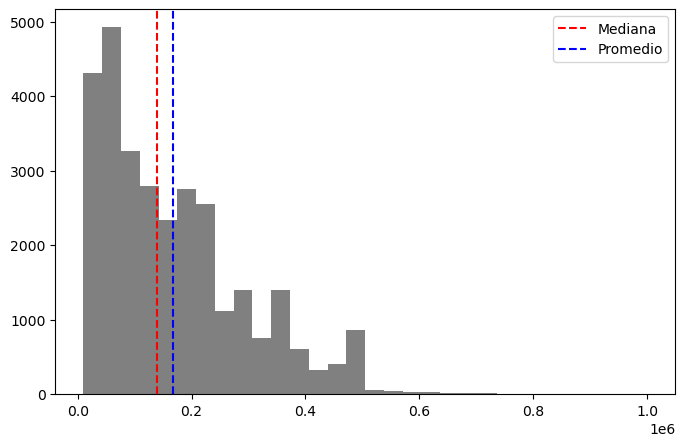

In [24]:
plt.figure(figsize=(8,5))
plt.axvline(mediana_valor_credito,color="red",linestyle="--",label="Mediana")
plt.axvline(promedio_valor_credito,color="blue",linestyle="--",label="Promedio")
plt.legend()
plt.hist(valor_credito,bins=30);

**Pruba de Normalidad**

Una prueba de hipótesis es una regla que especifica si se puede aceptar o rechazar una afirmación acerca de una población dependiendo de la evidencia proporcionada por una muestra de datos.

Un punto de decisión importante al trabajar con una muestra de datos es si utilizar métodos estadísticos paramétricos o no paramétricos. Los métodos estadísticos paramétricos asumen que los datos tienen una distribución conocida y específica, a menudo una distribución gaussiana. Si una muestra de datos no es gaussiana, entonces se violan los supuestos de las pruebas estadísticas paramétricas y deben usarse métodos estadísticos no paramétricos.

**Interpretación de una prueba**
* H0: El monto del credito proviene de una distribucción Normal
* Ha:El monto del credito No proviene de una distribucción Normal

p valor;

* p <= alfa : rechazar H0, no es normal.
* p> alpha : No rechazar H0, No significa que sea cierta normalidad, Significa que es muy probable que sea Normal


Prueba de Shapiro-Wilk Shapiro-Wilk evalúa una muestra de datos y cuantifica la probabilidad de que los datos se extraigan de una distribución gaussiana, llamada así por Samuel Shapiro y Martin Wilk.

En la práctica, se cree que la prueba de Shapiro-Wilk es una prueba confiable de normalidad, aunque se sugiere que la prueba puede ser adecuada para muestras de datos más pequeñas, por ejemplo, miles de observaciones o menos

D'Agostino's K-squared test La prueba de D'Agostino-Pearson verifica si la forma de la distribución es similar a la forma de la distribución normal. Esta es una combinación de la prueba de asimetría y la prueba de curtosis

In [25]:
alfa=0.05

In [26]:
stat,p_valor=stats.shapiro(valor_credito)

In [27]:
p_valor

0.0

In [28]:
if (p_valor <0.05):
  print("Rechazo Normalidad")
else:
  print("La variables es muy probable que tenga una distribucción normal")

Rechazo Normalidad


#### **Normalidad puede estar afectada por Datos Atípicos**

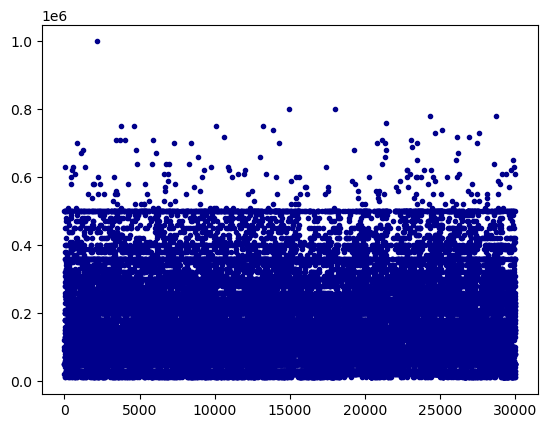

In [29]:
plt.plot(valor_credito,".",color="darkblue");

**Boxplot**

Un boxplot, también conocido como diagrama de caja y bigotes, es una representación gráfica que se utiliza en estadísticas y visualización de datos para mostrar la distribución de un conjunto de datos. Este gráfico proporciona información sobre la mediana, los cuartiles, los valores atípicos y la dispersión de los datos de una manera visual y fácil de interpretar.


* Caja (box): La caja en el gráfico representa el rango intercuartílico (IQR), que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). La longitud de la caja muestra la variabilidad en la mitad central de los datos.

* Línea mediana (median): Dentro de la caja, se traza una línea que representa la mediana (el valor que divide el conjunto de datos en dos partes iguales).

* Bigotes (whiskers): Los bigotes se extienden desde la caja hacia los valores extremos del conjunto de datos. La longitud de los bigotes suele estar relacionada con la dispersión de los datos, pero su cálculo puede variar según la interpretación y el software utilizado.

* Valores atípicos (outliers): Los valores que caen fuera de los bigotes se consideran valores atípicos y se muestran individualmente en el gráfico. Los valores atípicos son puntos que se desvían significativamente de la mayoría de los datos y pueden indicar valores inusuales o errores en la medición.


**El rango intercuartílico**

abreviado como IQR por sus siglas en inglés (Interquartile Range), es una medida estadística que se utiliza en estadística descriptiva para describir la dispersión o variabilidad de un conjunto de datos. El IQR se calcula como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) en un conjunto de datos ordenado de manera creciente. Los cuartiles dividen los datos en cuatro partes iguales, y el IQR se encuentra en el rango intermedio de los valores.

Para calcular el IQR, sigue estos pasos:

* Ordena los datos de manera ascendente.

* Calcula el primer cuartil (Q1), que es el valor que separa el 25% más bajo de los datos.

* Calcula el tercer cuartil (Q3), que es el valor que separa el 75% más bajo de los datos.

* Resta Q1 de Q3 para obtener el rango intercuartílico (IQR): IQR = Q3 - Q1.

El IQR es una medida útil de dispersión porque se basa en la posición de los cuartiles y, por lo tanto, no se ve afectado por valores extremos o atípicos en el conjunto de datos. Cuanto mayor sea el valor del IQR, mayor será la dispersión de los datos en la mitad central de la distribución. El IQR es especialmente útil cuando se desea identificar la variabilidad en la parte central de los datos y cuando se desea detectar valores atípicos utilizando reglas basadas en el IQR, como el método de "bigotes" en un diagrama de caja (boxplot).

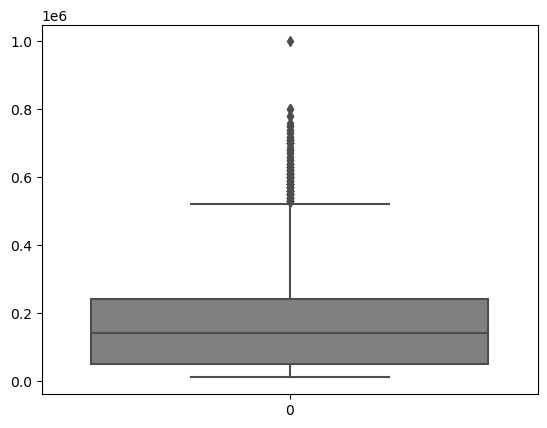

In [30]:
sns.boxplot(valor_credito);

In [31]:
## Programar funcion para RIC
def AplicarRIC(x):
  q1,q3=np.percentile(x,[25,75])
  RIC=q3-q1
  LimiteInferior=q1-1.5*RIC
  LimiteSuperior=q3+1.5*RIC
  return LimiteInferior,LimiteSuperior

In [32]:
LimiteInf,LimiteSup=AplicarRIC(valor_credito)

In [33]:
LimiteInf

-235000.0

In [34]:
LimiteSup

525000.0

In [35]:
df.head(1)

,ID,MontoCredito,Edad,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora,Genero_Homologado,EducacionHomologada,EstadoCivilHomologado
0,1,20000.0,24.0,2,2,-1,-1,-2,-2,3913.0,...,0.0,689.0,0.0,0.0,0.0,0.0,1,Masculino,Pregrado,Casado


''

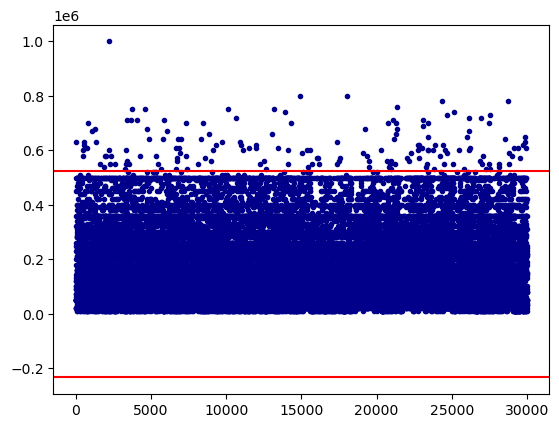

In [36]:
plt.plot(valor_credito,".",color="darkblue")
plt.axhline(y=LimiteInf,color="red")
plt.axhline(y=LimiteSup,color="red")
;

In [37]:
df["Atipico"]=""
df["Atipico"][(df["MontoCredito"]<=LimiteInf)]="ColaInferior"
df["Atipico"][(df["MontoCredito"]>=LimiteSup)]="ColaSuperior"

In [38]:
df_Atipica_ValorCredito=df[(df["MontoCredito"]<=LimiteInf) | (df["MontoCredito"]>=LimiteSup)]

In [39]:
df_Atipica_ValorCredito.describe()

,MontoCredito,Edad,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,617844.311377,39.329341,178937.994012,169347.934132,164999.257485,156153.550898,146738.245509,144621.832335,16107.185629,16426.035928,25239.598802,17180.011976,24235.844311,22004.862275
std,72652.994038,8.311295,201947.124919,196407.729142,187151.711213,185184.014389,181685.087968,170796.930743,35164.307810,36659.286960,85733.151078,48560.703383,55419.014255,48850.430275
min,530000.000000,28.000000,-509.000000,-1925.000000,-255.000000,-2800.000000,-261.000000,-736.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,560000.000000,32.500000,12136.500000,8071.000000,6027.500000,7114.000000,6678.000000,7839.500000,2870.000000,2450.000000,2509.500000,2032.500000,2634.500000,3000.000000
50%,600000.000000,38.000000,83707.000000,76797.000000,68573.000000,60479.000000,63218.000000,67667.000000,8229.000000,8348.000000,7721.000000,7000.000000,7253.000000,7511.000000
75%,655000.000000,45.000000,338822.500000,309938.500000,318521.500000,286203.500000,249625.500000,238365.000000,17008.000000,17154.500000,15079.500000,14500.000000,17018.000000,16993.500000
max,1000000.000000,67.000000,964511.000000,983931.000000,693131.000000,891586.000000,927171.000000,961664.000000,323014.000000,401003.000000,896040.000000,528897.000000,417990.000000,422000.000000


In [40]:
len(df_Atipica_ValorCredito)

167

In [41]:
len(df_Atipica_ValorCredito)/len(df)*100

0.5566666666666666

In [42]:
df_Atipica_ValorCredito.Mora.value_counts(normalize=True)

Mora
0    0.886228
1    0.113772
Name: proportion, dtype: float64

In [43]:
df.Mora.value_counts(normalize=True)

Mora
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [44]:
(0.886228- 0.7788)

0.10742799999999997

In [45]:
df.groupby("Mora")["MontoCredito"].mean()

Mora
0    178099.726074
1    130109.656420
Name: MontoCredito, dtype: float64

In [46]:
df_Sin_Atipica_ValorCredito=df[(df["MontoCredito"]>LimiteInf) & (df["MontoCredito"]<LimiteSup)]

''

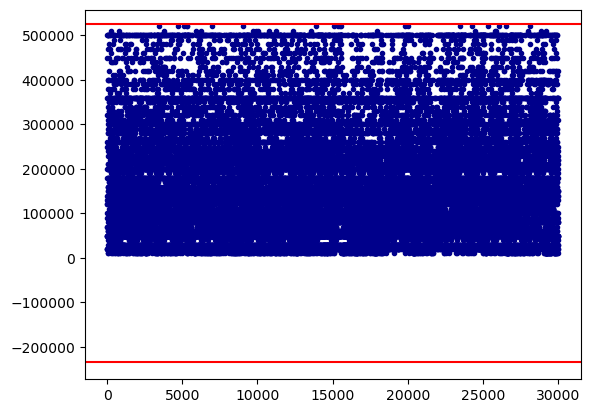

In [47]:
plt.plot(df_Sin_Atipica_ValorCredito.MontoCredito,".",color="darkblue")
plt.axhline(y=LimiteInf,color="red")
plt.axhline(y=LimiteSup,color="red")
;

In [48]:
df_Sin_Atipica_ValorCredito.describe()

,MontoCredito,Edad,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29833.000000,29833.000000,29833.000000,29833.000000,2.983300e+04,29833.000000,29833.000000,29833.000000,29833.000000,2.983300e+04,29833.000000,29833.000000,29833.000000,29833.000000
mean,164963.284953,35.463983,50508.406194,48506.390574,4.635269e+04,42631.006805,39715.641806,38279.789696,5605.118996,5.862359e+03,5113.647035,4756.921664,4690.585694,5121.518620
std,125529.099652,9.218344,71650.808789,69268.437060,6.754994e+04,62444.527519,58902.828515,57803.698109,16382.410837,2.292933e+04,16388.582348,15258.488005,14680.485954,17405.221856
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3520.000000,2963.000000,2.651000e+03,2310.000000,1749.000000,1240.000000,1000.000000,8.200000e+02,390.000000,291.000000,244.000000,102.000000
50%,140000.000000,34.000000,22284.000000,21072.000000,2.003300e+04,19002.000000,18070.000000,16990.000000,2100.000000,2.005000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,66604.000000,63387.000000,5.974400e+04,53952.000000,49939.000000,48914.000000,5001.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000
max,520000.000000,79.000000,653062.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000


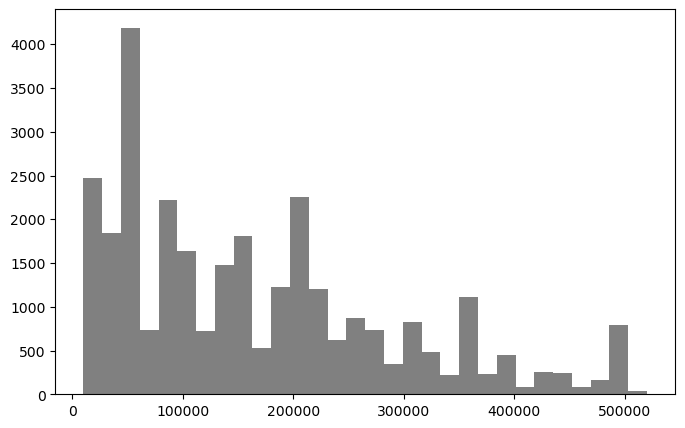

In [51]:
plt.figure(figsize=(8,5))
plt.hist(df_Sin_Atipica_ValorCredito.MontoCredito,bins=30);

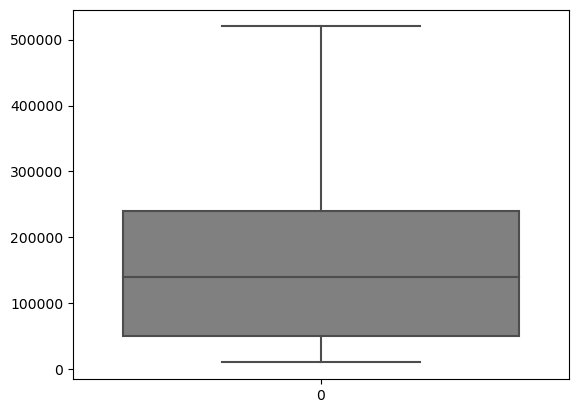

In [53]:
sns.boxplot(df_Sin_Atipica_ValorCredito.MontoCredito);

In [54]:
stat,p_valor=stats.shapiro(df_Sin_Atipica_ValorCredito.MontoCredito)

In [55]:
p_valor

0.0

### **La falta de normalidad**

En los datos se refiere a la violación de la suposición de normalidad en una distribución estadística. Esta suposición es común en muchas técnicas estadísticas y de análisis de datos. Cuando los datos no siguen una distribución normal (también conocida como distribución gaussiana), pueden surgir varias consecuencias y consideraciones, incluyendo:

* Impacto en pruebas estadísticas paramétricas: Muchas pruebas estadísticas paramétricas, como la prueba t de Student y el análisis de varianza (ANOVA), asumen la normalidad de los datos. La falta de normalidad puede llevar a resultados incorrectos o sesgados en estas pruebas. En tales casos, se deben buscar alternativas no paramétricas.

* Dificultades en la estimación de parámetros: Cuando los datos no son normales, la estimación de parámetros, como la media y la desviación estándar, puede no ser precisa. Esto puede afectar la toma de decisiones basada en las estimaciones de estos parámetros.

* Problemas con la interpretación de intervalos de confianza: Los intervalos de confianza asumen la normalidad de los datos. Si los datos no son normales, los intervalos de confianza pueden ser incorrectos y llevar a decisiones erróneas.

* Problemas en regresión lineal: La regresión lineal, que es ampliamente utilizada para modelar relaciones entre variables, supone la normalidad de los residuos. Cuando esta suposición no se cumple, los modelos de regresión pueden ser inapropiados y los resultados pueden ser poco confiables.

* Riesgo de sesgo en análisis de hipótesis: Si se ignoran las desviaciones de la normalidad, se corre el riesgo de realizar inferencias erróneas, lo que puede llevar a decisiones incorrectas en investigaciones científicas o empresariales.

* Desafíos en la toma de decisiones basadas en datos: Cuando los datos no son normales, se debe tener precaución al tomar decisiones basadas en el análisis de datos. Los resultados pueden no ser representativos de la población subyacente.

* Mayor necesidad de técnicas no paramétricas: Cuando los datos no son normales, es posible que sea necesario recurrir a técnicas no paramétricas que no dependan de suposiciones sobre la distribución de los datos. Estas técnicas suelen ser menos poderosas que las paramétricas, pero pueden ser más apropiadas en estos casos.

* Identificación de valores atípicos: En algunos casos, la falta de normalidad puede ser indicativa de valores atípicos o datos atípicos en el conjunto de datos. Identificar y tratar estos valores atípicos puede ser importante.

**Teorema del Limite central**

El Teorema del Límite Central (TLC) es un concepto fundamental en estadísticas y probabilidad que describe un fenómeno importante. Básicamente, el TLC establece que, independientemente de la forma de la distribución de una población, la distribución de la media de una muestra grande de esa población se aproxima a una distribución normal.

In [57]:
df_Sin_Atipica_ValorCredito.MontoCredito.mean() # por TLC el promedio puede converger al distribucción normal

164963.2849529045

## **3.1.3 Enfoque no Paramétrico para calcular un paramétro Poblacional: Simulación computacional**

Bootstrapping El bootstrapping (o bootstrap) es un método de remuestreo propuesto por Bradley Efron en 1979. Se utiliza para aproximar la distribución en el muestreo de un estadístico. Se usa frecuentemente para aproximar el sesgo o la varianza de un análisis estadístico, así como para construir intervalos de confianza o realizar contrastes de hipótesis sobre parámetros de interés. En la mayor parte de los casos no pueden obtenerse expresiones cerradas para las aproximaciones bootstrap y por lo tanto es necesario obtener remuestras en un ordenador para poner a prueba el método. La enorme potencia de cálculo de los ordenadores actuales facilita considerablemente la aplicabilidad de este método tan costoso computacionalmente

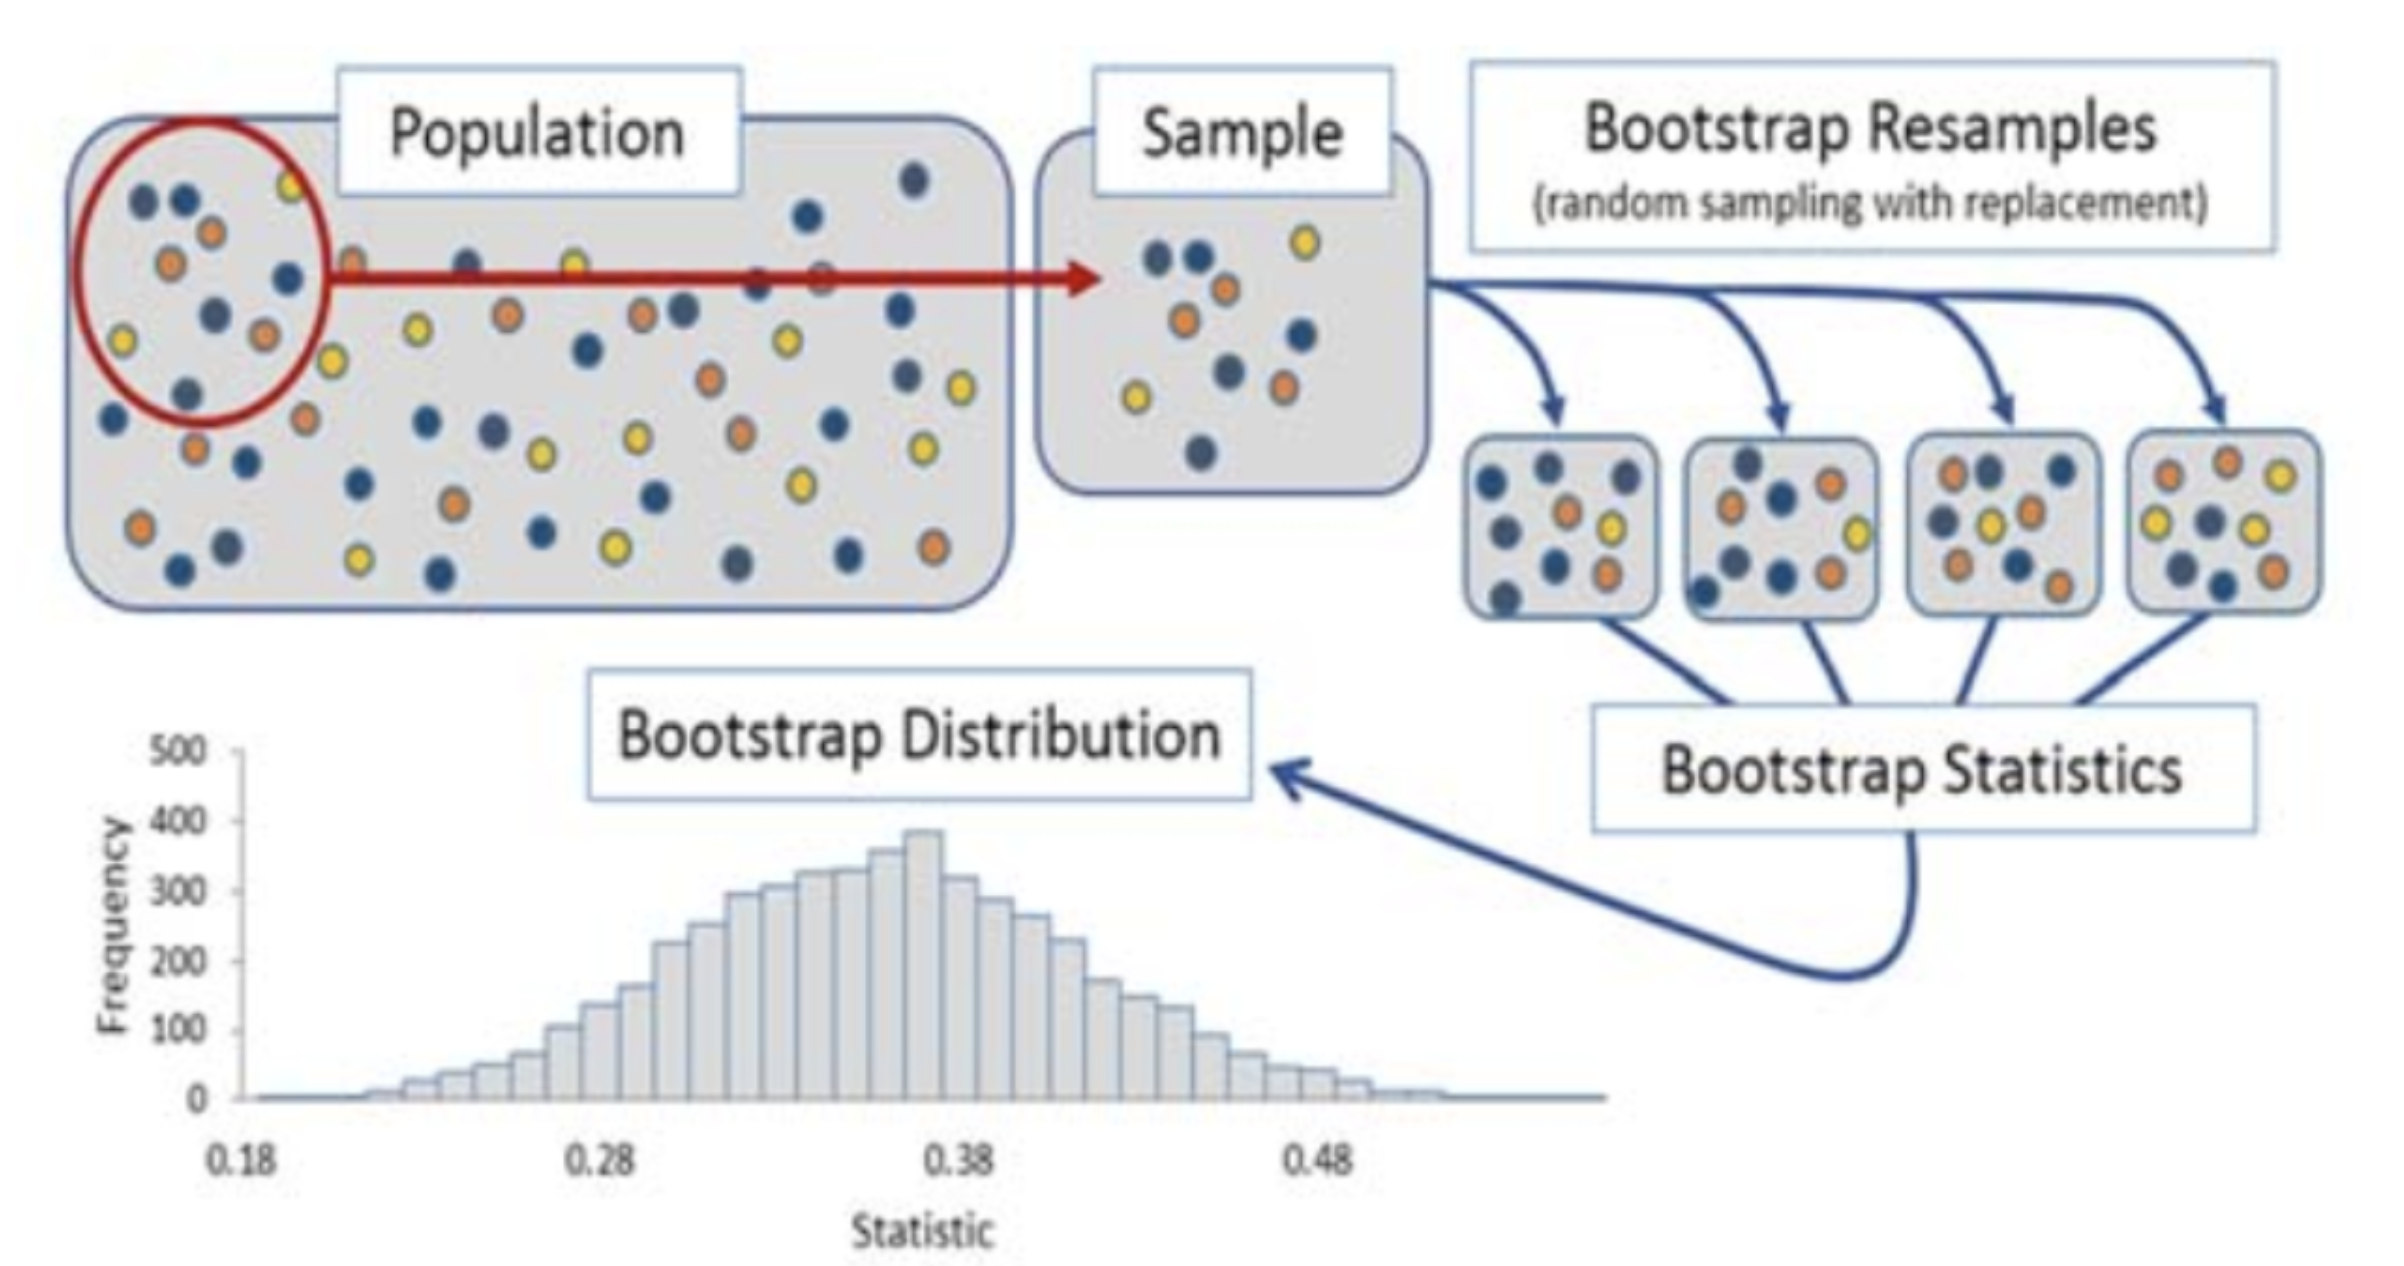

In [80]:
def calcular_mediana(x):
    estadistico=np.median(x)
    return estadistico

In [81]:
def calcular_media(x):
    estadistico=np.mean(x)
    return estadistico

In [82]:
def boostraping(x,fun_estadistico,n_iteraciones=10000,muestra=1000):
    
    distribuccion_boostraping=np.full(shape=n_iteraciones,fill_value=np.nan) # Se crea el vector
    
    for i in tqdm(range(n_iteraciones)):
        ## Sampleo
        resample=np.random.choice(x,size=muestra,replace=True)
        distribuccion_boostraping[i]=fun_estadistico(resample)
    return distribuccion_boostraping

In [84]:
PromedioBoostraping=boostraping(df_Sin_Atipica_ValorCredito.MontoCredito,fun_estadistico=calcular_media,n_iteraciones=500000,muestra=5000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:39<00:00, 12514.86it/s]


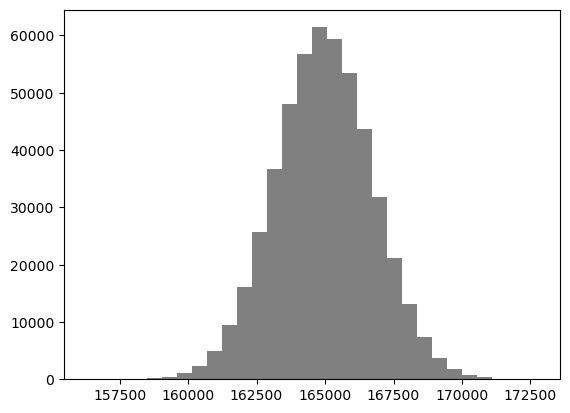

In [85]:
plt.hist(PromedioBoostraping,bins=30);

In [86]:
np.mean(PromedioBoostraping)

164963.743076896

In [87]:
df_Sin_Atipica_ValorCredito.MontoCredito.mean() # por TLC el promedio puede converger al distribucción normal

164963.2849529045

# **Intervalo de confianza**

In [88]:
promedio=np.mean(df_Sin_Atipica_ValorCredito.MontoCredito)

In [89]:
promedio

164963.2849529045

In [90]:
std_dev = np.std(df_Sin_Atipica_ValorCredito.MontoCredito)

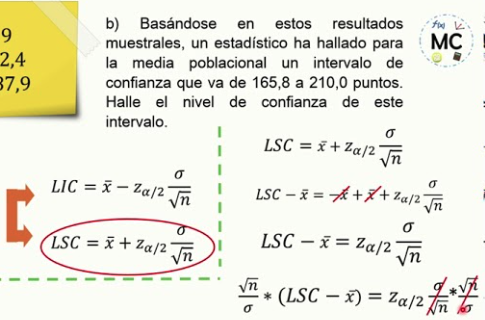

In [92]:
sample_size = len(df_Sin_Atipica_ValorCredito.MontoCredito)

In [95]:
sample_size 
confidence_level = 0.95

In [96]:
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * (std_dev / np.sqrt(sample_size))

In [101]:
confidence_interval = (promedio - margin_of_error, promedio + margin_of_error)

In [102]:
confidence_interval 

(163538.8692197059, 166387.7006861031)